In [61]:
from imdb import Cinemagoer
import matplotlib.pyplot as plt
import threading
import time
from rich.live import Live
from rich.table import Table
dico_th = {}
liste = []
ia = Cinemagoer()

In [58]:
def run_in_thread(f):
    def func(*args):
        while threading.active_count() > 12:
            time.sleep(0.5)
        th = threading.Thread(target=f, args=args)
        dico_th[th] = args[0]
        th.start()
        return th
    return func

In [59]:
def generate_table() -> Table:
    # table d'affichage des recherches
    table = Table()
    table.add_column('Personne')
    table.add_column('Recherche')

    for th, p in dico_th.items():
        nom = p
        # si c'est un objet Person, on récupère le nom
        if not isinstance(nom, str):
            nom = p['title']
        table.add_row(nom, "[red]En cours" if th.is_alive() else "[green]Terminée")
    return table

In [ ]:
def live_table():
    # gestion de l'affichage des table de recherche
    with Live(generate_table()) as live:
        for _ in range(1000): # compteur empêchant l'update de cesser
            live.update(generate_table())
            time.sleep(0.5)
            if threading.active_count() == 2:
                # quand les threads sont terminés
                # (seuls le main et la boucle sont actifs)
                live.update(generate_table())
                time.sleep(0.5)
                break

In [ ]:
def get_person(name):
    persons = ia.search_person(name)
    person = ia.get_person(persons[0].personID)
    return person

In [ ]:
def get_genre(person):
    if 'actress' in person.get('filmography'):
        return 'actress'
    return 'actor'

In [ ]:
@run_in_thread
def get_movie(movie):
    print(threading.active_count())
    return ia.get_movie(movie.movieID)

In [60]:
def search_movies(listemovies):
    for m in listemovies:
        if threading.active_count() > 12:
            time.sleep(0.5)
        liste.append(get_movie(m))
    live_table()

In [ ]:
def get_filmo(person, isdir=False):
    if isdir and 'director' in person.get("filmography"):
        lstfilms = person.get('director')
    else:
        lstfilms = person.get(get_genre(person))

    return lstfilms    

In [ ]:
def plot(name, isdir=False):
    person = get_person(name)
    lstfilms = search_movies(get_filmo(person, isdir))
    
    lstfilms.sort(key=lambda x: x.get('year'))
    
    x = [i.get('year') for i in lstfilms]
    y = [i.get('rating') for i in lstfilms]

    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()

In [62]:
def get_mean(name, isdir=False):
    person = get_person(name)
    search_movies(get_filmo(person, isdir))
    
    liste.sort(key=lambda x: x.get('year'))
    
    x = [i.get('year') for i in lstfilms]
    y = [i.get('rating') for i in lstfilms]
    
    note = 0
    for n in liste:
        if n.get('rating') is not None:
            note += n.get('rating')

    note = note / len(liste)
    print(note)

In [63]:
get_mean('kubrick', True)
get_mean('hitchcock', True)
get_mean('james cameron', True)

8
9
10
11
12
13
13
12
13
13
13
13
13
13


/home/alex/python/imdb/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter
support
  warnings.warn('install "ipywidgets" for Jupyter support')

11
12


KeyboardInterrupt: 

In [ ]:
print(threading.active_count())

7


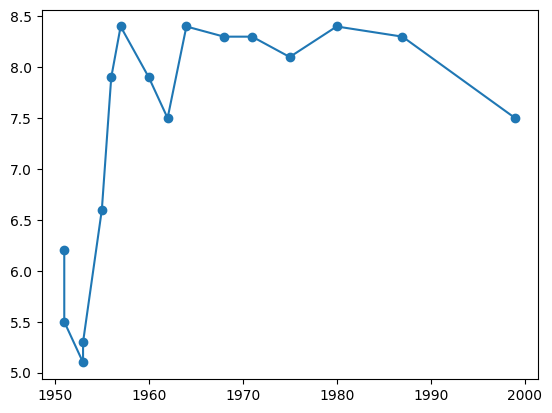

In [ ]:
test('', True)

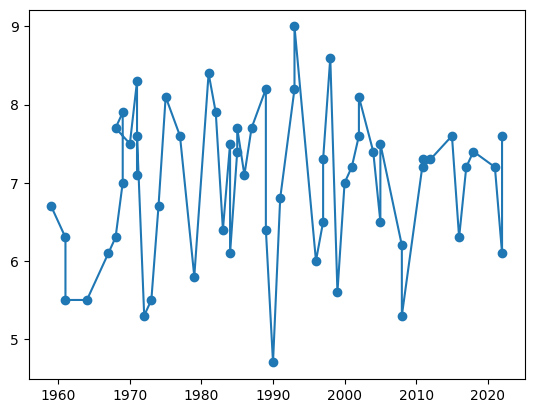

In [ ]:
test('spielberg')

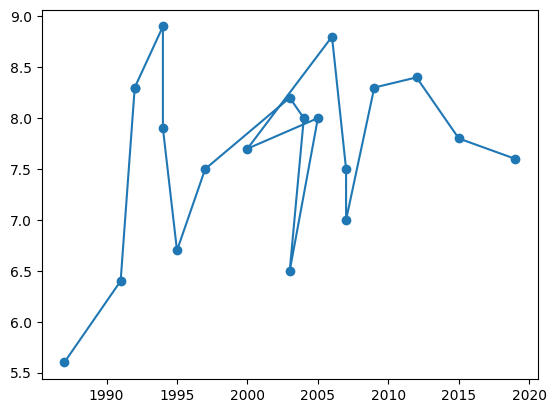

In [ ]:
test('tarantino')

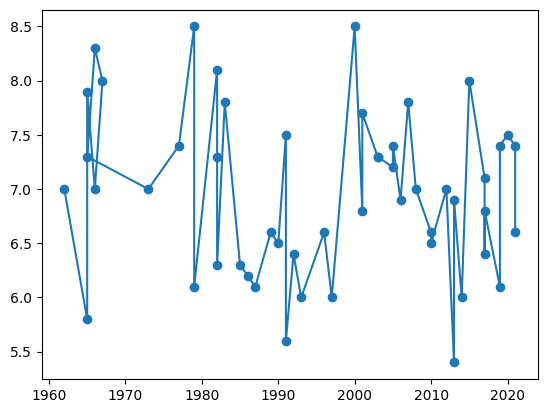

In [ ]:
test('ridley scott')

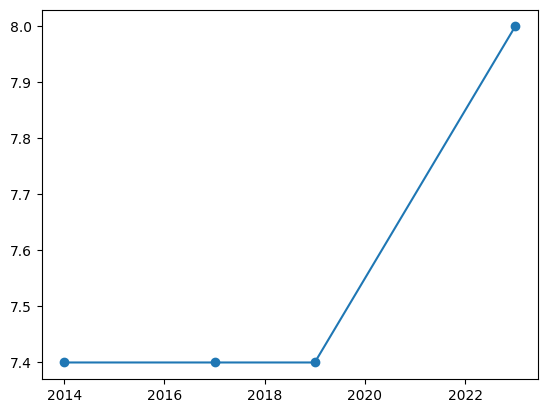

In [ ]:
test('stahelsky')

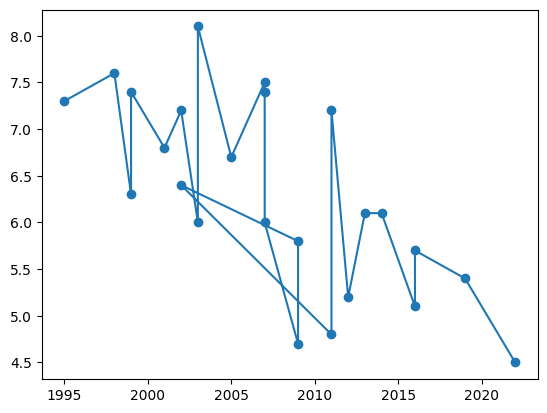

In [ ]:
test('rob zombie')

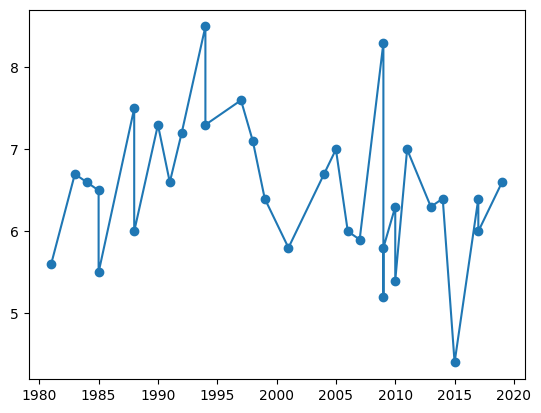

In [ ]:
test('besson')

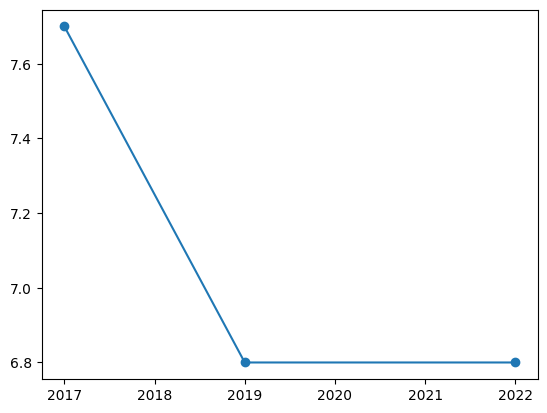

In [ ]:
test('jordan peele')

In [ ]:
def acteur(name, n=0):
    person = ia.get_person(ia.search_person(name)[0].personID)
    if n:
         lstfilms = person.get('actor')[:n]
    else:
        lstfilms = person.get('actor')

    lstfilms2 = []
    for i in lstfilms:
        lstfilms2.append(ia.get_movie(i.movieID))
    x = [i.get('year') for i in lstfilms2]
    y = [i.get('rating') for i in lstfilms2]

    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()

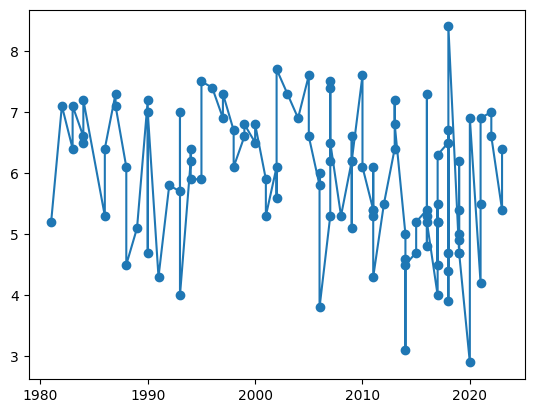

In [ ]:
acteur('nicolas cage')